WEEK 2 PCA SCRIPT

PCA :- is a mathematical method used for data analysis. It is one of the most significant features extraction techniques, the major use of principal components analysis is to Reduce the feature and to handle missing values. The principal component analysis is a dimensionality reduction method that is usually used to reduce a large number of input variables to a small number of variables that still contains most of the information as a large dataset.

PCA transforms a set of dependent variables into a set of independents which handles with uncorrelated variables called Principal Component (PC). Most of the major possible variances will be recalled in the first PC and then the next PCs will decrease the possible variances. The objectives of PCA are to reduce the dimension of the data and select new variables that relevant to the best outcome. Two approaches are using in PCA. i.e., Eigenvalues and Eigenvectors.

For the purpose of the assignment we will be using the same dataset that we used in the previous Week-1 Assignment i.e Pima Indian Diabetes Dataset.

PCA Algorithm Steps of Principal component Analysis: Step 1 – Transforming the data to a similar scale Step 2– Standardized the data. i.e., Re-center the original dataset to the origin at means zero Step 3 – Calculate eigenvalue and eigenvector of the covariance matrix. Step 4– Calculate trace and variance explained by principal components. Step 5 – Derive the new data through the selected principal components. (New = eigenvector * Data)

In [59]:
# Import pandas
import numpy as np #linear algebra
from scipy.stats import mode
import scipy as sc
import pandas as pd # For data processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns #Data Visualization
import sklearn
from numpy import set_printoptions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
%matplotlib inline

LOADING DATASET : PIMA INDIAN DIABETES

In [4]:
#Read in the file
Diabetes= pd.read_csv("/Users/dhanashri/Documents/diabetes2.csv")
#Display the data 
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


GETTING OVERVIEW OF THE DATA 

In [6]:
print(Diabetes.shape)
print(Diabetes.describe())

(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

In [7]:
print("Rows         :",Diabetes.shape[0])
print("Columns      :",Diabetes.shape[1])
print("\nFeatures :\n ", Diabetes.columns.tolist())
print("\nMissing Values :   ", Diabetes.isnull().sum().values.sum())
print("\nUnique Values:     \n", Diabetes.nunique())

Rows         : 768
Columns      : 9

Features :
  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing Values :    0

Unique Values:     
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [9]:
#Class Distribution for Diabetes Dataset 
count_class = Diabetes.groupby('Outcome').size()
print(count_class)

#The below output shows the number of observation with class zero are twice that of no. of observations with 1

Outcome
0    500
1    268
dtype: int64


In [13]:
#Checking the correlation amongst the variables
correlation = Diabetes.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [14]:
print(Diabetes.skew())

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


DATA PREPROCESSING 

In [67]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = Diabetes[feature_names]
scaler = StandardScaler()

# define X

scaled_feature_matrix = pd.DataFrame(scaler.fit_transform(X))
y = Diabetes.Outcome

In [68]:
scaled_feature_matrix

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `

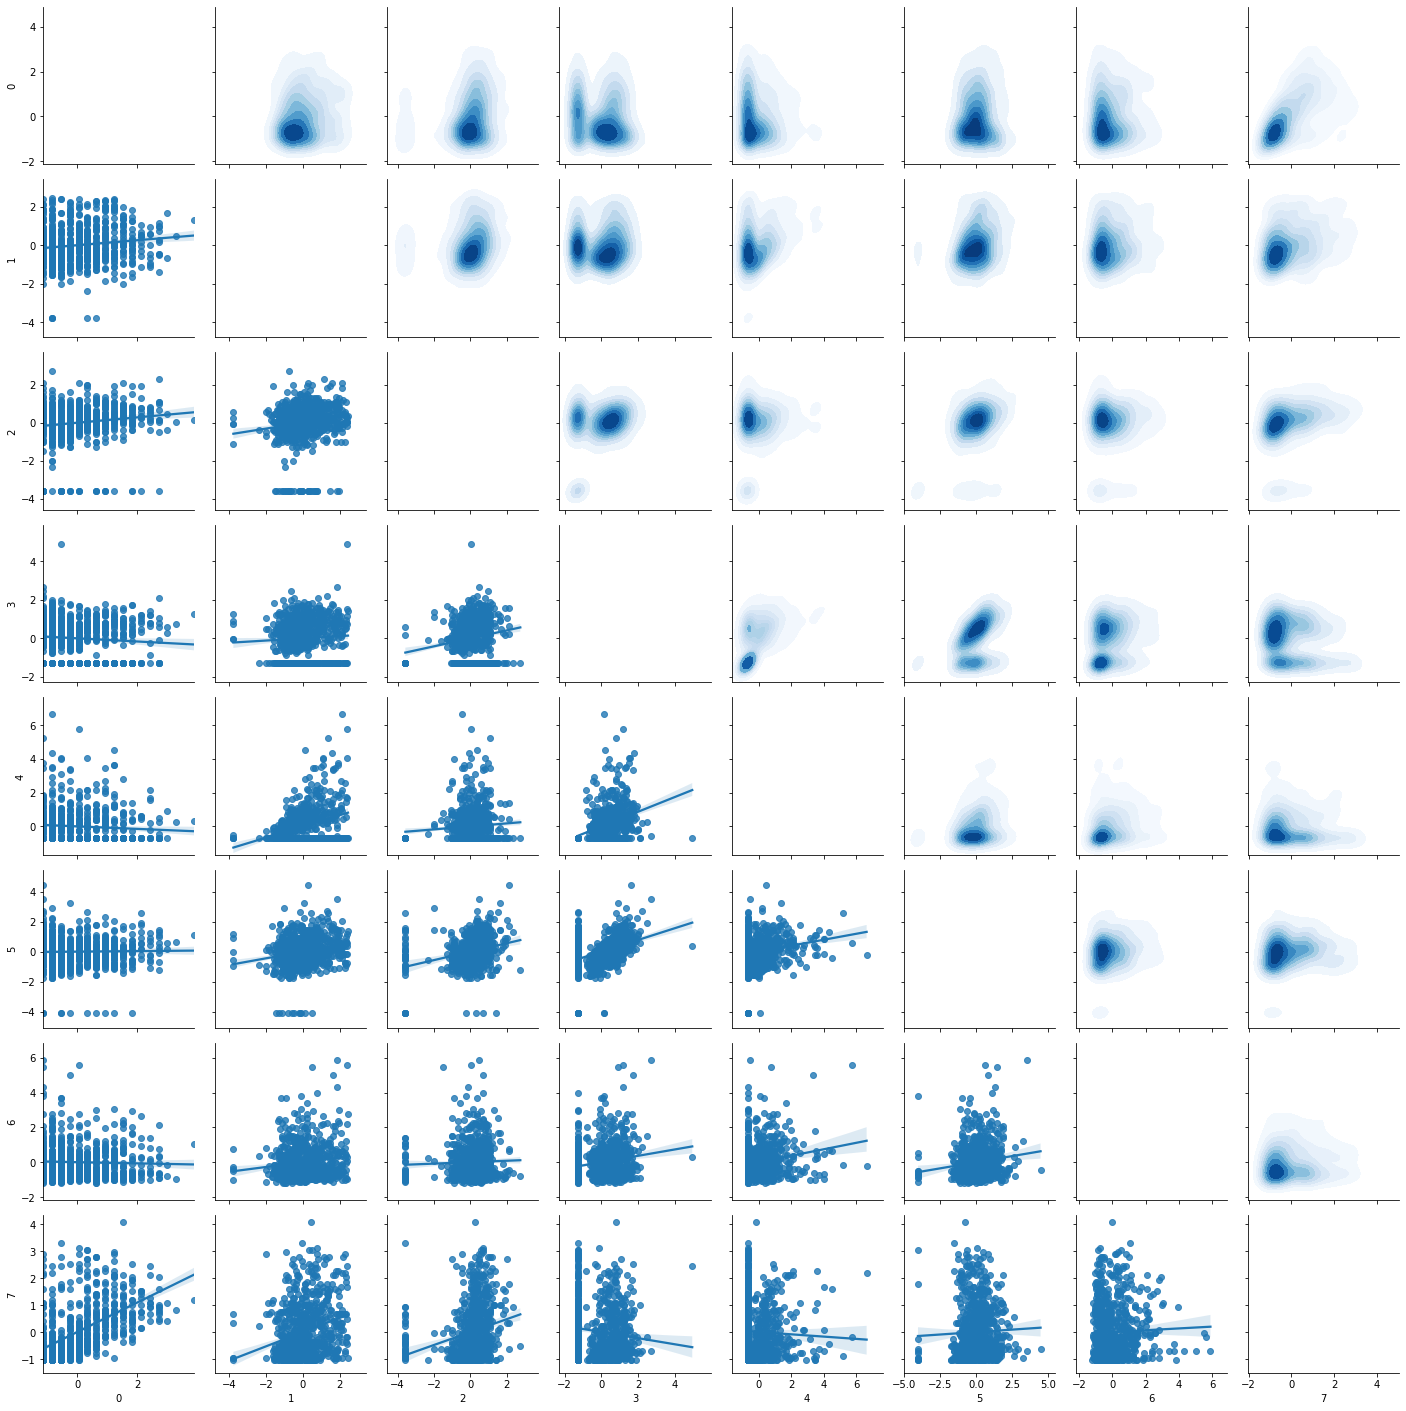

In [69]:
g = sns.PairGrid(scaled_feature_matrix)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

PCA

In [71]:
from sklearn.decomposition import PCA

In [72]:
# extract principal components 

# if not specified: n_components = min(n_samples, n_features)
# thus, in this case, n_components = 10, since n_features = 10
pca = PCA(n_components=4)
pca.fit(scaled_feature_matrix)
pca
#The result below gives the Principle Components

PCA(n_components=4)

#Principle Component weighting vectors(Eigen Vectors)

In [73]:
pc_names = [f'PC{i+1}' for i in range(len(pca.components_))]

In [75]:
print(X.columns)
for i, pc in enumerate(pc_names):
    print(pc, 'weighting vector:', pca.components_[i], '\n')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
PC1 weighting vector: [0.13 0.39 0.36 0.44 0.44 0.45 0.27 0.2 ] 

PC2 weighting vector: [ 0.59  0.17  0.18 -0.33 -0.25 -0.1  -0.12  0.62] 

PC3 weighting vector: [-0.01  0.47 -0.54 -0.24  0.34 -0.36  0.43  0.08] 

PC4 weighting vector: [ 0.08 -0.4   0.06  0.04 -0.35  0.05  0.83  0.07] 



In [77]:
#Transforming the original data into principle component space
feat_mat_pcs = pd.DataFrame(pca.transform(scaled_feature_matrix), columns=pc_names)
feat_mat_pcs

,PC1,PC2,PC3,PC4
0,1.068503,1.234895,0.095930,0.496990
1,-1.121683,-0.733852,-0.712938,0.285056
2,-0.396477,1.595876,1.760678,-0.070395
3,-1.115781,-1.271241,-0.663729,-0.579123
4,2.359334,-2.184819,2.963107,4.033099
...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926
764,-0.100405,-0.614181,-0.764353,-0.134859
765,-0.283475,0.097065,-0.077192,-0.687561
766,-1.060324,0.837062,0.425030,-0.204493


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `

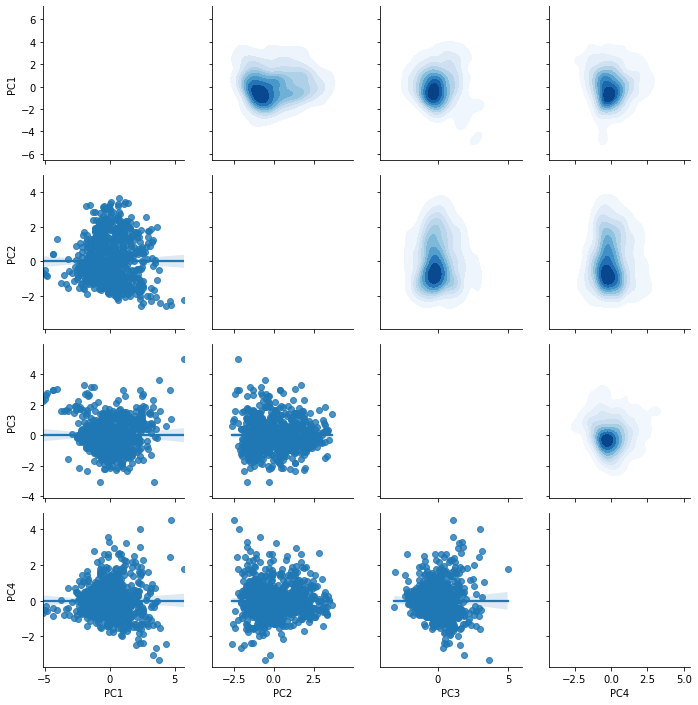

In [78]:
g = sns.PairGrid(feat_mat_pcs)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()


In [81]:
pca.explained_variance_ #Principal component explained variance

array([2.1 , 1.73, 1.03, 0.88])

In [82]:
pca.explained_variance_ratio_ #Explained ratio

array([0.26, 0.22, 0.13, 0.11])